Classification

Objective:
The objective of this assessment is to evaluate your understanding and ability to apply
supervised learning techniques to a real-world dataset.
Dataset:
Use the breast cancer dataset available in the sklearn library.
Key components to be fulfilled:
- Loading and Preprocessing (2 marks):
-  Load the breast cancer dataset from sklearn.
-  Preprocess the data to handle any missing values and perform necessary feature
scaling.
-  Explain the preprocessing steps you performed and justify why they are
necessary for this dataset.
- Classification Algorithm Implementation (5 marks):
Implement the following five classification algorithms:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Support Vector Machine (SVM)
5. k-Nearest Neighbors (k-NN)
For each algorithm, provide a brief description of how it works and why it might be
suitable for this dataset.
-  Model Comparison (2 marks):
- Compare the performance of the five classification algorithms.
- Which algorithm performed the best and which one performed the worst?
Timely Submission (1 mark)
● Submission Guidelines: Provide your code in a Jupyter Notebook format and
submit the GitHub link here. Ensure your explanations and answers are clear and
concise.

In [352]:
#!pip install imbalanced-learn

In [353]:
# import all the necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler,LabelEncoder 
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 
from imblearn.over_sampling import SMOTE  
  


In [354]:
from sklearn.datasets import load_breast_cancer
breast_cancer=load_breast_cancer()
breast_cancer
breast_cancer=pd.DataFrame(data=breast_cancer.data,columns=breast_cancer.feature_names)
breast_cancer['target']=load_breast_cancer().target 
breast_cancer.head()    

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [355]:
breast_cancer.shape


(569, 31)

In [356]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [357]:
breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [358]:
breast_cancer.drop_duplicates(inplace=True)
breast_cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [359]:
breast_cancer.shape

(569, 31)

Based on initial Analysis,didnt find any missing values or duplicate records in the dataset

EXPLORATORY DATA ANALYSIS

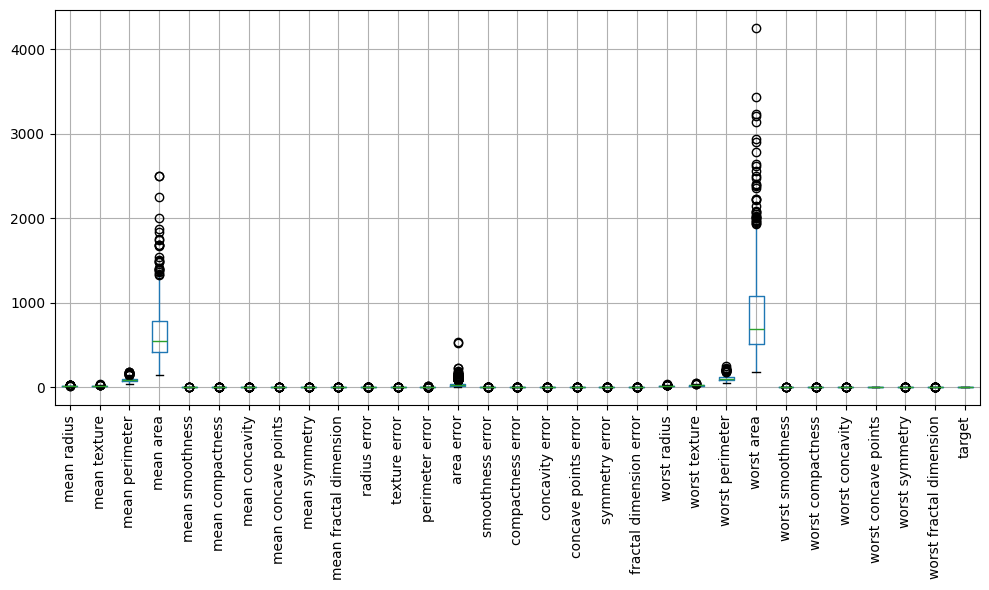

In [360]:
# To analyse and visuaize the dataset especially for the distribution pattern
plt.figure(figsize=(10,6))
breast_cancer.boxplot(rot=90)
plt.tight_layout()
plt.show()

By analysing the above boxplot,it shows there are multiple columns has outliers.mean area,area error,worst perimeter,worst area,mean perimeter etc.As its a medical dataset,i am not suggesting to undergo outlier removal,because tumour size may vary from person to person.


In [361]:
breast_cancer['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

its a kind of imbalance dataset.So we can apply SMOTE analysis on this 

In [362]:
#let check for outliers and its count in the dataset
Q1=breast_cancer.quantile(0.25)
Q3=breast_cancer.quantile(0.75) 
IQR=Q3-Q1
outliers=((breast_cancer<(Q1-1.5*IQR)) | (breast_cancer>(Q3+1.5*IQR))).sum()
outliers

mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension    24
target                      0
dtype: int64

As per the above suggestion,i am not removing the outliers.this we can handle using some scaler methods.
- Splitting the dataset
- Apply scaling
- SMOTE as the dataset is imbalanced
- As this dataset target column is already encoded, no need of encoding here

In [363]:
# Splitting the dataset
X=breast_cancer.drop('target',axis=1)
y=breast_cancer['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=20,random_state=42)

In [364]:
#scaling the dataset
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [365]:
print(y_train.value_counts())


target
1    346
0    203
Name: count, dtype: int64


In [366]:
sm=SMOTE(random_state=42)
X_train_resampled,y_train_resampled=sm.fit_resample(X_train,y_train)

In [367]:
#so our training dataset is x_train-resampled and y_train_resampled
y_train.value_counts()
y_train_resampled.value_counts()    
#now its balanced

target
0    346
1    346
Name: count, dtype: int64

# Logistic regression
- This is a simple classification algorithm.

In [368]:
lr=LogisticRegression()
lr.fit(X_train_resampled,y_train_resampled)
y_pred=lr.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of Logistic Regression model:",accuracy*100)    
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))   
Logistic=accuracy
# to save the model
import joblib
joblib.dump(lr,'breast_cancer_model_lr.pkl')

Accuracy of Logistic Regression model: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[ 9  0]
 [ 0 11]]


['breast_cancer_model_lr.pkl']

# Decision Tree Classifier
- Decision tree is the algorithm that works better for both classification and regression problems.For the discrete values to predict,we can make use of Decesion tree Classifier else Decision tree regressor.decision tree finds a node that has low impurity,this can be calcuated using the criterion gini index,entropy or log loss.this process will continue until a leaf node .

In [369]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=42)
dt.fit(X_train_resampled,y_train_resampled)
y_pred_dt=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,y_pred_dt)    
print("Accuracy of Decision Tree Classifier model:",accuracy_dt*100)
print("Classification Report:\n",classification_report(y_test,y_pred_dt))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_dt))
Decision_tree=accuracy_dt
#by using the cretion as entropy,falso negatuve count increased to one.so better is gini 
joblib.dump(dt,'breast_cancer_model_dt.pkl')

Accuracy of Decision Tree Classifier model: 95.0
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Confusion Matrix:
 [[ 9  0]
 [ 1 10]]


['breast_cancer_model_dt.pkl']

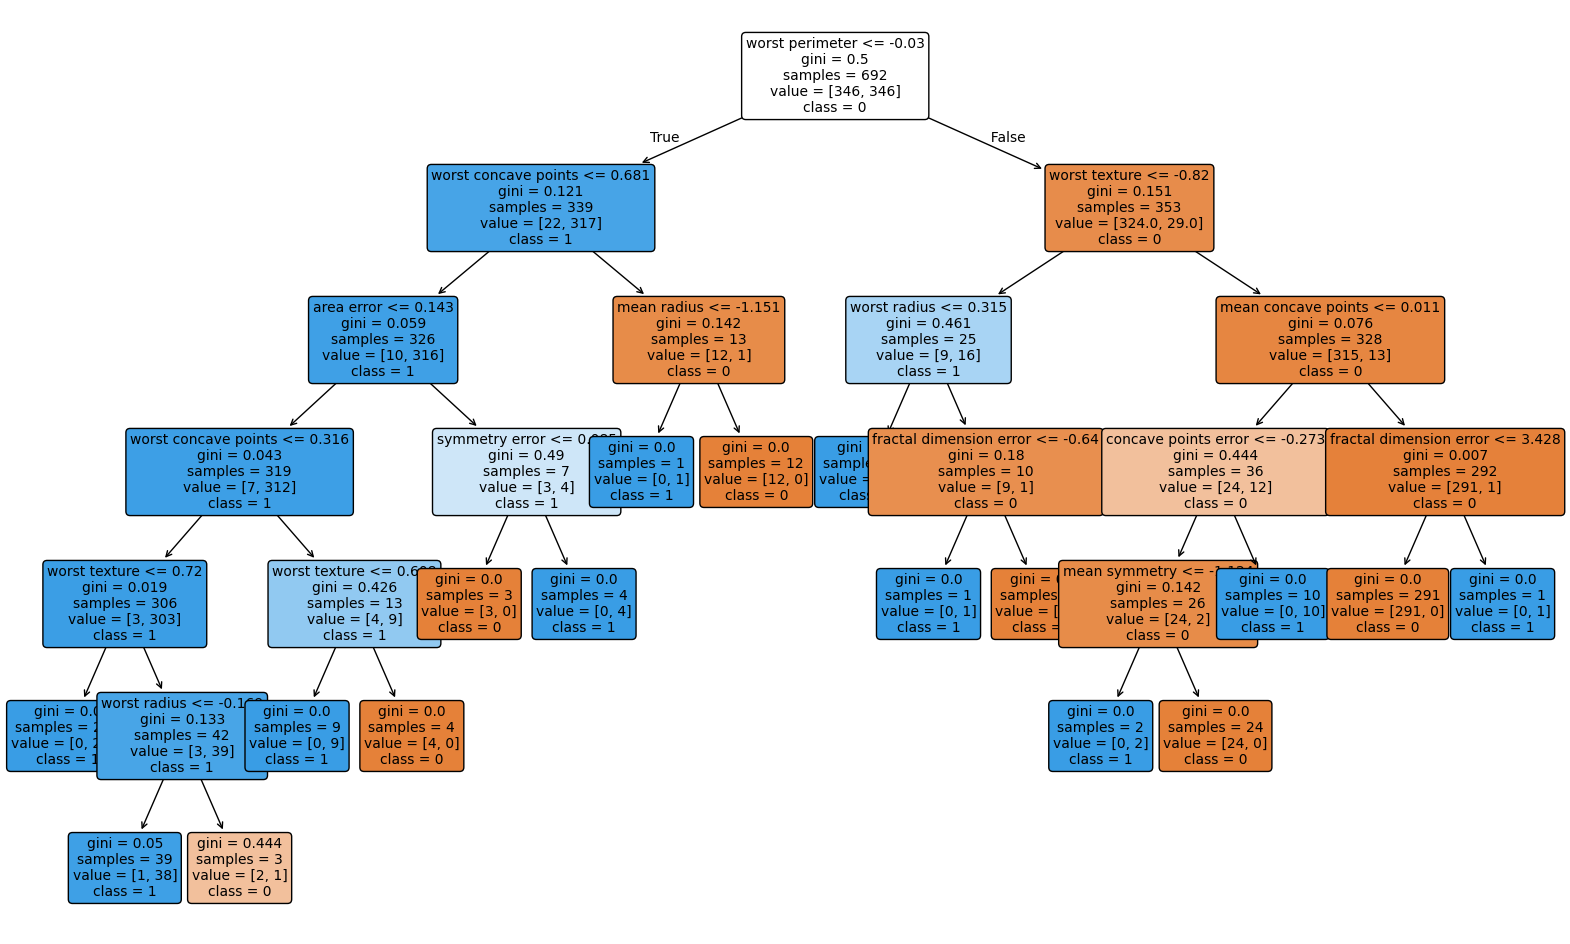

In [370]:
plt.figure(figsize=(20, 12))
plot_tree(
    dt,
    feature_names=breast_cancer.drop('target', axis=1).columns,
    class_names=breast_cancer.target.unique().astype(str),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()




# Random Forest Claassifier

In [371]:
rf=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=6,random_state=42)
rf.fit(X_train_resampled,y_train_resampled) 
y_pred_rf=rf.predict(X_test)
accuracy_rf=accuracy_score(y_test,y_pred_rf)    
print("Accuracy of Random Forest Classifier model:",accuracy_rf*100)
print("Classification Report:\n",classification_report(y_test,y_pred_rf))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rf))
Random_Forest=accuracy_rf
# in this both gini and entropy gives same results.
joblib.dump(rf,'breast_cancer_model_rf.pkl')


Accuracy of Random Forest Classifier model: 95.0
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Confusion Matrix:
 [[ 9  0]
 [ 1 10]]


['breast_cancer_model_rf.pkl']

Lets check with Adaboost and GradientBoost also

In [372]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ada=AdaBoostClassifier(n_estimators=100,random_state=42)
ada.fit(X_train_resampled,y_train_resampled)
y_pred_ada=ada.predict(X_test)
accuracy_ada=accuracy_score(y_test,y_pred_ada)
print("Accuracy of AdaBoost Classifier model:",accuracy_ada*100)
print("Classification Report:\n",classification_report(y_test,y_pred_ada))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_ada))
Adaboost=accuracy_ada

gb=GradientBoostingClassifier(n_estimators=100,random_state=42,learning_rate=0.1)
gb.fit(X_train_resampled,y_train_resampled) 
y_pred_gb=gb.predict(X_test)
accuracy_gb=accuracy_score(y_test,y_pred_gb)
print("Accuracy of Gradient Boosting Classifier model:",accuracy_gb*100)
print("Classification Report:\n",classification_report(y_test,y_pred_gb))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_gb))
GradientBoost=accuracy_gb


C:\Users\jasmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoost Classifier model: 90.0
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Confusion Matrix:
 [[ 8  1]
 [ 1 10]]
Accuracy of Gradient Boosting Classifier model: 95.0
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Confusion Matrix:
 [[ 9  0]
 [ 1 10]]


By applying adaboost and gradient boost ,seen that gradient boot is much better .both decsion tree and gradient boost contributes the same accuracy

# SVM

In [373]:
sv=SVC(kernel='linear',C=1.0,random_state=42)
sv.fit(X_train_resampled,y_train_resampled)
y_pred_sv=sv.predict(X_test)
accuracy_sv=accuracy_score(y_test,y_pred_sv)
print("Accuracy of SVM model:",accuracy_sv*100)
print("Classification Report:\n",classification_report(y_test,y_pred_sv))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_sv))
# linear kernel is better than rbf here.getting one false negative while using rbf kernel.
SVM_=accuracy_sv
joblib.dump(sv,'breast_cancer_model_svm.pkl')



Accuracy of SVM model: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[ 9  0]
 [ 0 11]]


['breast_cancer_model_svm.pkl']

# KNN

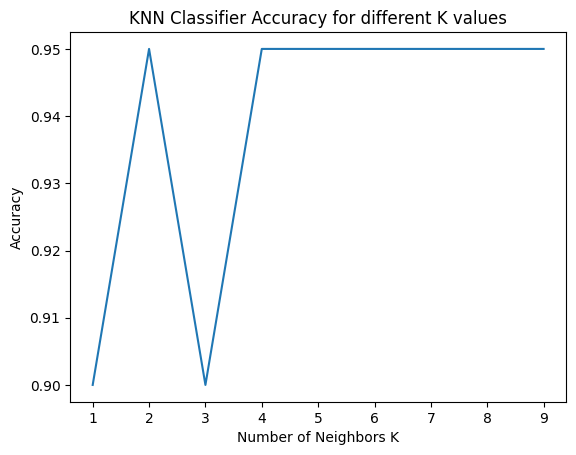

In [374]:
accuracy_list=[]
for k in range (1,10):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_resampled,y_train_resampled)    
    y_pred_knn=knn.predict(X_test)
    accuracy_knn=accuracy_score(y_test,y_pred_knn)
    accuracy_list.append(accuracy_knn)  

plt.plot(range(1,10),accuracy_list)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')      
plt.title('KNN Classifier Accuracy for different K values')
plt.show()




Based on Above best k value will be 4 or 5

In [375]:
knn_1=KNeighborsClassifier(n_neighbors=4)
knn_1.fit(X_train_resampled,y_train_resampled)    
y_pred_knn=knn_1.predict(X_test)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
print("Accuracy of KNN model:",accuracy_knn*100)
print("Classification Report:\n",classification_report(y_test,y_pred_knn))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_knn))
KNN_=accuracy_knn
joblib.dump(knn_1,'breast_cancer_model_knn_1.pkl')

Accuracy of KNN model: 95.0
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Confusion Matrix:
 [[ 9  0]
 [ 1 10]]


['breast_cancer_model_knn_1.pkl']

In [376]:
knn_1=KNeighborsClassifier(n_neighbors=4)
cv_scores=cross_val_score(knn_1,X_train_resampled,y_train_resampled,cv=5)
print("Cross-validation scores for KNN with k=4:",cv_scores)
print("Mean cross-validation score:",cv_scores.mean())
Knn_crossval=cv_scores.mean()

Cross-validation scores for KNN with k=4: [0.97122302 0.96402878 0.94927536 0.97101449 0.97826087]
Mean cross-validation score: 0.9667605046397665


By Applyying cross validation accuracy increased from 95 to 96.Cross validation is a techniques that divides different folds iteratively so that each fold will taken as test data .so it will train all the patterns present in the dataset


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'AdaBoost'),
  Text(4, 0, 'Gradient Boost'),
  Text(5, 0, 'SVM'),
  Text(6, 0, 'KNN'),
  Text(7, 0, 'KNN Cross-Validation')])

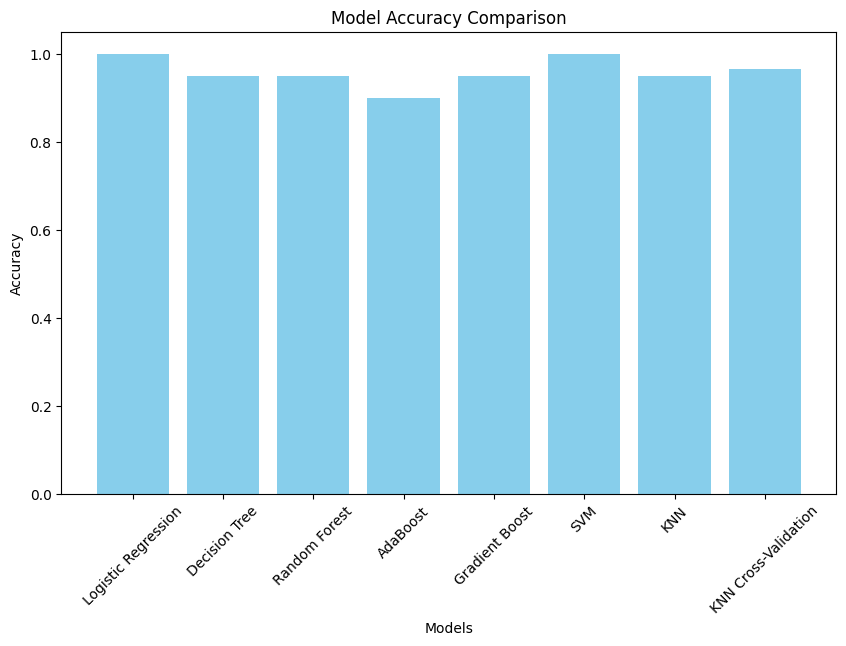

In [379]:
accuracyscores=[Logistic,Decision_tree,Random_Forest,Adaboost,GradientBoost,SVM_,KNN_,Knn_crossval]
model_names=['Logistic Regression','Decision Tree','Random Forest','AdaBoost','Gradient Boost','SVM','KNN','KNN Cross-Validation']
accuracy_df=pd.DataFrame({'Model':model_names,'Accuracy':accuracyscores})
plt.figure(figsize=(10,6))
plt.bar(accuracy_df['Model'],accuracy_df['Accuracy'],color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')  
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)


From the above bar chart,its clearly identified that Logistic regression and SVM are the models that contributes to 100% accuracy.But overfitting may also may results to 100% accuracy.When comparing KNN and after applying cross validation on KNN,KNN cross validation gives better result 